In [ ]:
# Bibliotecas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Pré-processamento
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Seleção
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Métricas dos nossos modelos
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

# Pipeline
from sklearn.pipeline import make_pipeline

In [ ]:
df1 = pd.read_csv("student-por.csv", delimiter = ";")
df2 = pd.read_csv("student-mat.csv", delimiter = ";")

In [ ]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Análise Exploratória e Pré-Processamento dos dados

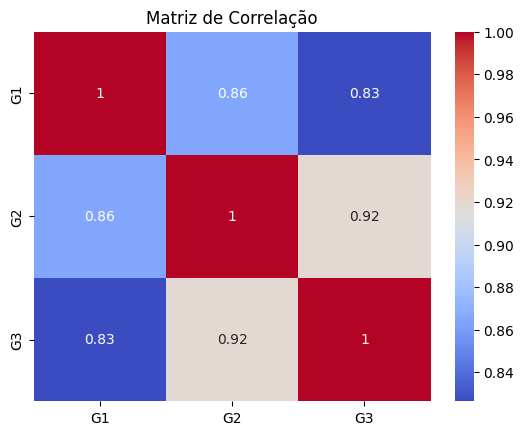

In [ ]:
matriz_correlacao = df1[["G1", "G2", "G3"]].corr()

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

plt.title('Matriz de Correlação')
plt.show()

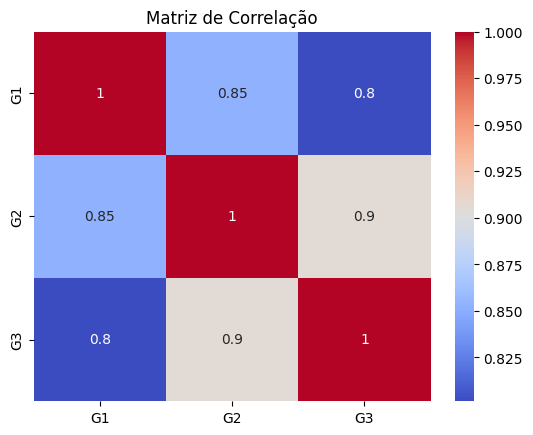

In [ ]:
matriz_correlacao = df2[["G1", "G2", "G3"]].corr()

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

plt.title('Matriz de Correlação')
plt.show()

Como a correlação entre as G1, G2 e G3 são excessivamente altas, significa que a G3 leva em consideração as outras duas notas, logo, considerarmos G1 e G2 no modelo vai causar um vazamento de Y para os dados de treino, inviabilizando nosso estudo.

In [ ]:
df1_ = df1.drop(["G1", "G2"], axis = 1)
df2_ = df2.drop(["G1", "G2"], axis = 1)
# Vou considerar apenas G3 e prever apenas ela

Começar analisando um pouco do nosso target G3, ele possui valores de 0 a 20, sendo apenas valores inteiros, trata-se de uma nota, logo quanto maior melhor a nota. Vamos agora analisar um pouco da distribuição dele e outros valores estatísticos.

In [ ]:
print(df1_["G3"].describe())
print(df2_["G3"].describe())

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64
count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


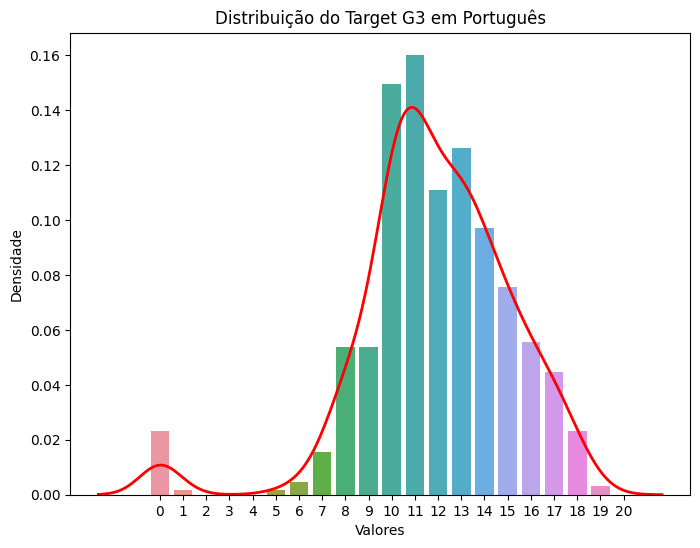

In [ ]:
densidade = df1_['G3'].value_counts(normalize=True)
densidade_sorted = densidade.sort_index()
densidade_sorted = densidade_sorted.reindex(range(21), fill_value=0)

plt.figure(figsize=(8, 6))
sns.barplot(x=densidade_sorted.index, y=densidade_sorted.values)

sns.kdeplot(df1_['G3'], color='red', linewidth=2)

plt.title('Distribuição do Target G3 em Português')
plt.xlabel('Valores')
plt.ylabel('Densidade')

plt.show()


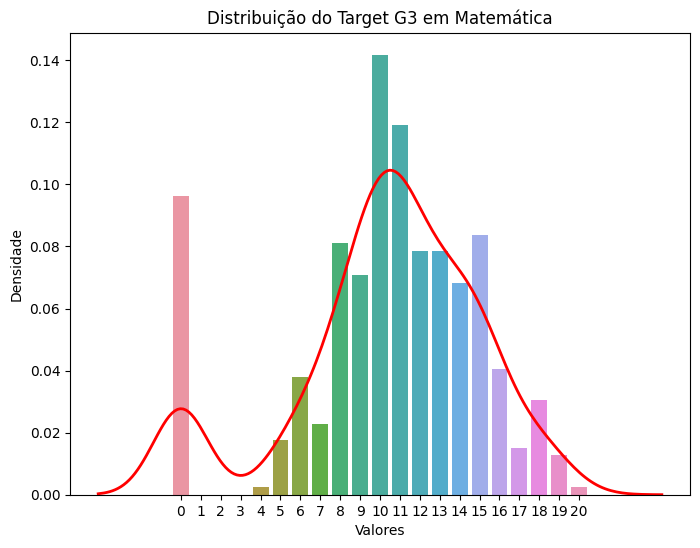

In [ ]:
densidade = df2_['G3'].value_counts(normalize=True)
densidade_sorted = densidade.sort_index()

# Preencher valores ausentes com 0
densidade_sorted = densidade_sorted.reindex(range(21), fill_value=0)

plt.figure(figsize=(8, 6))
sns.barplot(x=densidade_sorted.index, y=densidade_sorted.values)
sns.kdeplot(df2_['G3'], color='red', linewidth=2)

plt.title('Distribuição do Target G3 em Matemática')
plt.xlabel('Valores')
plt.ylabel('Densidade')

plt.show()

Observando um pouco da distribuição das notas finais, podemos observar que matemática os valores são mais puxados e mais bem distribuidos para valores menores do que em português, ou seja, possui mais notas baixas em matemática que português.

Vale lembrar que analisar os dados das duas disciplinas separadamente pode ser benéfico para entender melhor as diferenças entre essas duas áreas de conhecimento e como o desempenho dos alunos pode ser diferente em cada disciplina.

Em geral os valores se concentram ao redor de 10 e 11, nos dois grupos, que são os valores considerados médios. No caso de portugal, os países de onde esses dados vieram, é necessário ter notas iguais ou superiores a 10 para ser considerado aprovado.

No treinamento do modelo isso será convertido para multiclasse e determinaremos o desempenho do aluno em 3 classes que serão definidas posteriormente.

Agora vamos olhar um pouco mais ou redor de outras features, ver como estão distribuidos nos dados e como elas podem ser comportam em relação às notas do aluno. Veremos um pouco da contagem dos alunos, tanto por sexo quanto por idade.

In [ ]:
# Começaremos pela idade e pelo sexo
print(df1_["sex"].value_counts())
print(df2_["sex"].value_counts())

print(df1_["age"].value_counts().sort_index())
print(df2_["age"].value_counts().sort_index())

F    383
M    266
Name: sex, dtype: int64
F    208
M    187
Name: sex, dtype: int64
15    112
16    177
17    179
18    140
19     32
20      6
21      2
22      1
Name: age, dtype: int64
15     82
16    104
17     98
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64


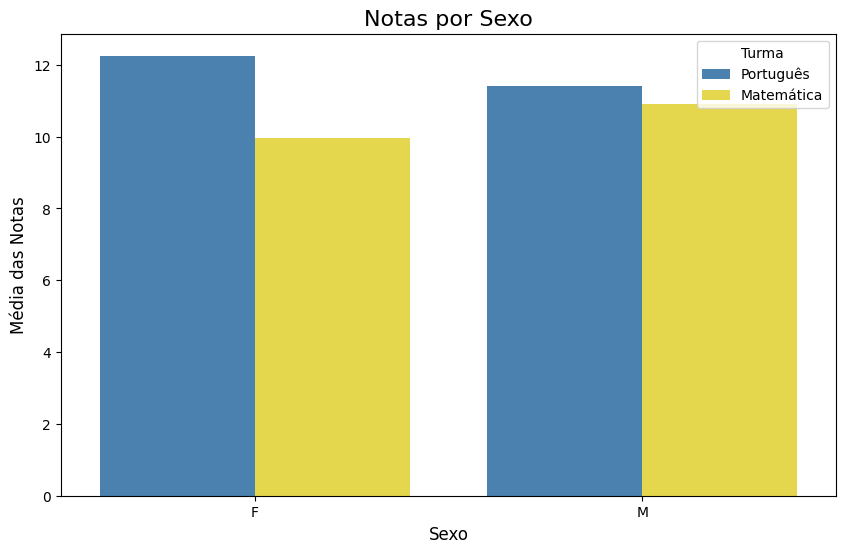

In [ ]:
notas_por_sexo1 = df1_.groupby('sex')['G3'].mean().reset_index()
notas_por_sexo1["Turma"] = "Português"

notas_por_sexo2 = df2_.groupby('sex')['G3'].mean().reset_index()
notas_por_sexo2["Turma"] = "Matemática"

notas_por_sexo = pd.concat([notas_por_sexo1, notas_por_sexo2])

sns.set_palette(["#0a64ae", "#ffe800"])
plt.figure(figsize=(10, 6))

sns.barplot(x='sex', y='G3', data=notas_por_sexo, hue="Turma", alpha=0.8)

plt.title('Notas por Sexo', fontsize=16)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Média das Notas', fontsize=12)

plt.subplots_adjust(hspace=0.4)
plt.legend(title="Turma")
plt.show()

As idades se distribuem de 15 até 22 anos de idade, além de estarem concetradas entre 16, 17 e 18 anos. Além disso, as mulheres são maioria nos dois grupos de alunos.

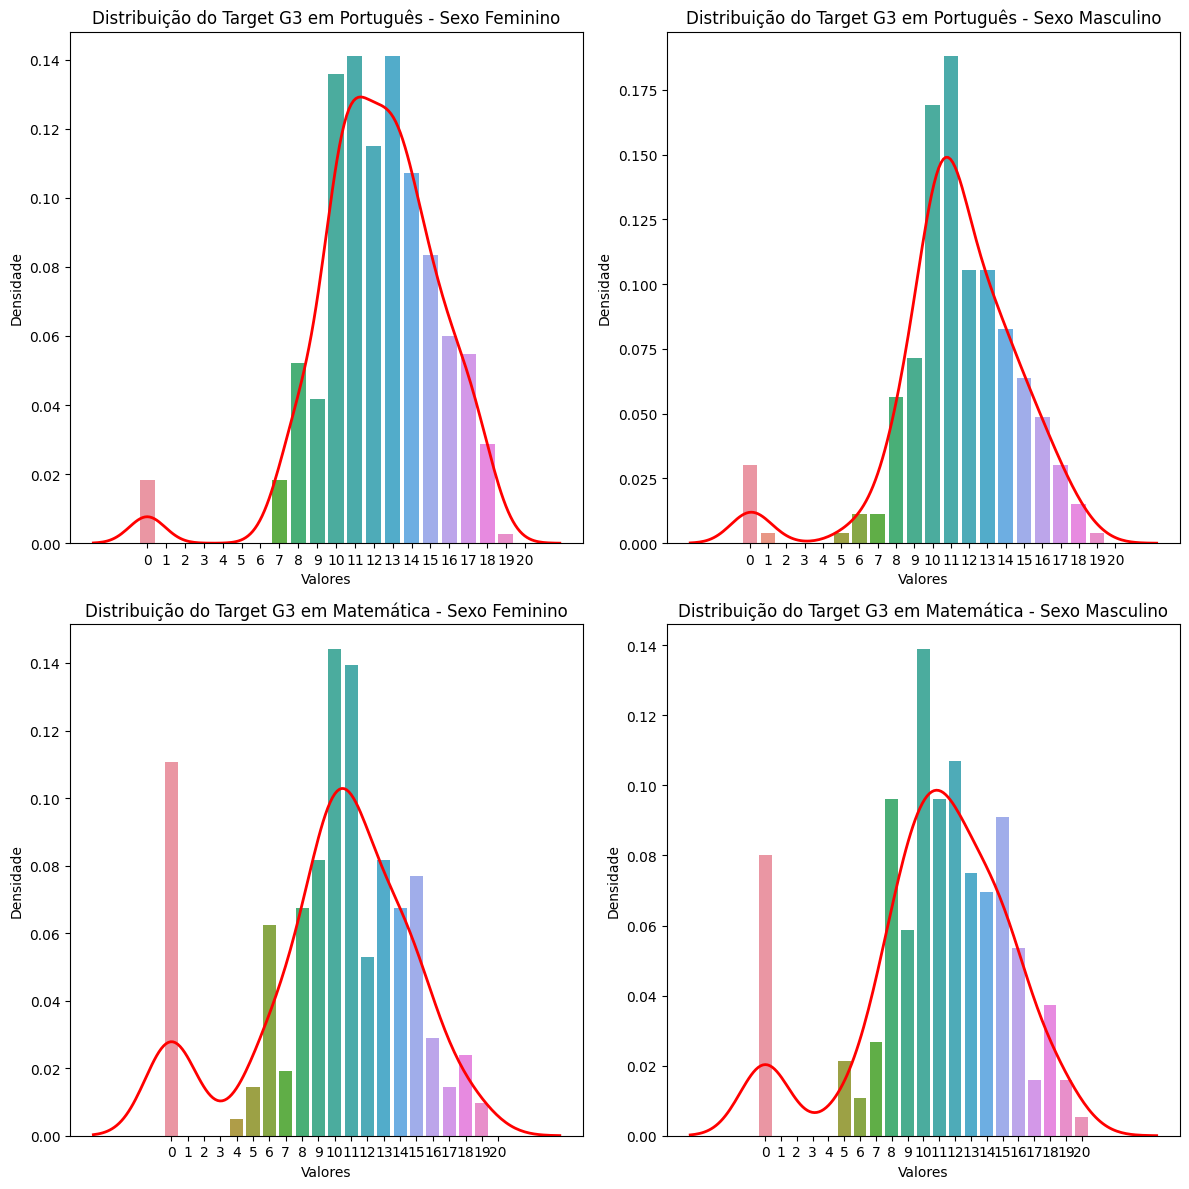

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Gráfico para o sexo masculino - Português
densidade_masc_port = df1_.loc[df1_["sex"] == "M"]['G3'].value_counts(normalize=True)
densidade_sorted_masc_port = densidade_masc_port.sort_index()

densidade_sorted_masc_port = densidade_sorted_masc_port.reindex(range(21), fill_value=0)

sns.barplot(x=densidade_sorted_masc_port.index, y=densidade_sorted_masc_port.values, ax=axs[0, 1])
sns.kdeplot(df1_.loc[df1_["sex"] == "M"]['G3'], color='red', linewidth=2, ax=axs[0, 1])

axs[0, 1].set_title('Distribuição do Target G3 em Português - Sexo Masculino')
axs[0, 1].set_xlabel('Valores')
axs[0, 1].set_ylabel('Densidade')

# Gráfico para o sexo feminino - Português
densidade_fem_port = df1_.loc[df1_["sex"] == "F"]['G3'].value_counts(normalize=True)
densidade_sorted_fem_port = densidade_fem_port.sort_index()

densidade_sorted_fem_port = densidade_sorted_fem_port.reindex(range(21), fill_value=0)

sns.barplot(x=densidade_sorted_fem_port.index, y=densidade_sorted_fem_port.values, ax=axs[0, 0])
sns.kdeplot(df1_.loc[df1_["sex"] == "F"]['G3'], color='red', linewidth=2, ax=axs[0, 0])

axs[0, 0].set_title('Distribuição do Target G3 em Português - Sexo Feminino')
axs[0, 0].set_xlabel('Valores')
axs[0, 0].set_ylabel('Densidade')

# Gráfico para o sexo masculino - Matemática
densidade_masc_math = df2_.loc[df2_["sex"] == "M"]['G3'].value_counts(normalize=True)
densidade_sorted_masc_math = densidade_masc_math.sort_index()

densidade_sorted_masc_math = densidade_sorted_masc_math.reindex(range(21), fill_value=0)

sns.barplot(x=densidade_sorted_masc_math.index, y=densidade_sorted_masc_math.values, ax=axs[1, 1])
sns.kdeplot(df2_.loc[df2_["sex"] == "M"]['G3'], color='red', linewidth=2, ax=axs[1, 1])

axs[1, 1].set_title('Distribuição do Target G3 em Matemática - Sexo Masculino')
axs[1, 1].set_xlabel('Valores')
axs[1, 1].set_ylabel('Densidade')

# Gráfico para o sexo feminino - Matemática
densidade_fem_math = df2_.loc[df2_["sex"] == "F"]['G3'].value_counts(normalize=True)
densidade_sorted_fem_math = densidade_fem_math.sort_index()

densidade_sorted_fem_math = densidade_sorted_fem_math.reindex(range(21), fill_value=0)

sns.barplot(x=densidade_sorted_fem_math.index, y=densidade_sorted_fem_math.values, ax=axs[1, 0])
sns.kdeplot(df2_.loc[df2_["sex"] == "F"]['G3'], color='red', linewidth=2, ax=axs[1, 0])

axs[1, 0].set_title('Distribuição do Target G3 em Matemática - Sexo Feminino')
axs[1, 0].set_xlabel('Valores')
axs[1, 0].set_ylabel('Densidade')

plt.tight_layout()
plt.show()

Observando rapidamente a média das notas de diferentes sexos das duas turmas podemos notar que homens tem uma média um pouco mais em matemática, enquanto as alunas do sexo feminino se saem melhor em português

Analisando mais profundamente a distribuição dos dados é possível ver que apesar das diferenças de médias, o sexo masculino e o feminino acabam tendo comportamentos relativamente semelhantes na turma de matemática, quando observamos apenas o kernel de distribuição. Já no caso da turma de português as mulheres acabam tendo uma distribuição mais concentrada nos valores próximo a média, 10, 11, 12 e 13, diferentemente dos homens que as notas se concentram bastante nos 10 e 11.

Podemos notar diferenças entre o desempenho dos diferentes sexos, mas quando consideramos as diferentes turmas, fica mais complexo já que o comportamento entre as turmas de português e matemática são muito distintos.

Dessa forma, não é aconselhável misturar esses dados, que pode ser uma ideia inicial interessante, como as turmas tem características estritamente diferentes é melhor manter as duas separadas e fazer uma análise dos modelos de forma distinta para cada uma.

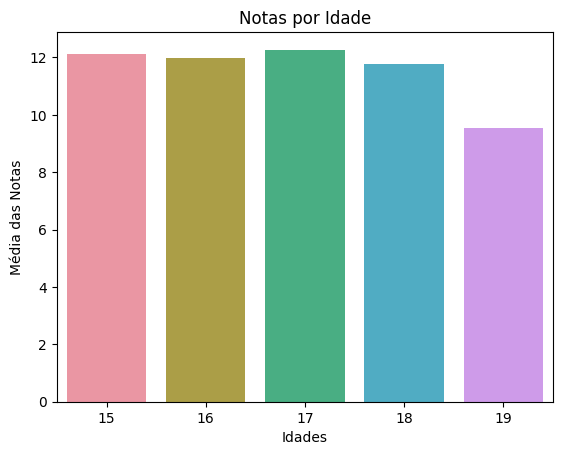

In [ ]:
notas_por_idade = df1_.loc[df1_["age"] < 20].groupby('age')['G3'].mean().reset_index()

sns.barplot(x='age', y='value', data=pd.melt(notas_por_idade, ['age']))

plt.title('Notas por Idade')
plt.xlabel('Idades')
plt.ylabel('Média das Notas')

plt.show()

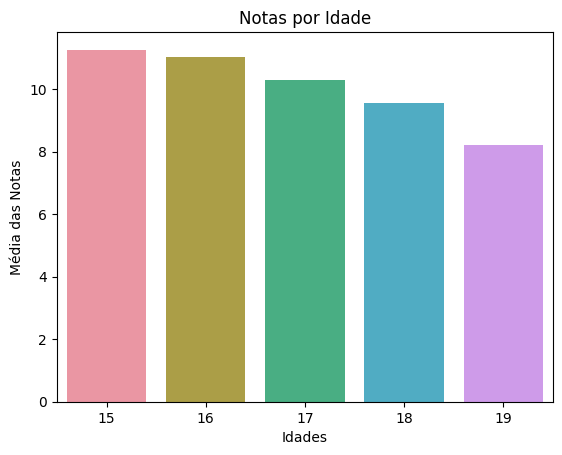

In [ ]:
notas_por_idade = df2_.loc[df2_["age"] < 20].groupby('age')['G3'].mean().reset_index()

sns.barplot(x='age', y='value', data=pd.melt(notas_por_idade, ['age']))

plt.title('Notas por Idade')
plt.xlabel('Idades')
plt.ylabel('Média das Notas')

plt.show()

Se ignorarmos as idades 20, 21 e 22, que nos dois grupos possui uma quantidade muito baixa de alunos, podemos enxergar que quanto mais velho o desempenho vai diminuindo, talvez devido ao fato de alunos mais velhos terem necessidades diferentes como trabalhar, ou talvez por serem alunos que repetiram alguma outra vez.

No caso do grupo de português a média de notas é mais homogênea e há pouca variação, mas analisando rapidamente pode-se enxergar que alunos mais velhos costumam ter menores notas.

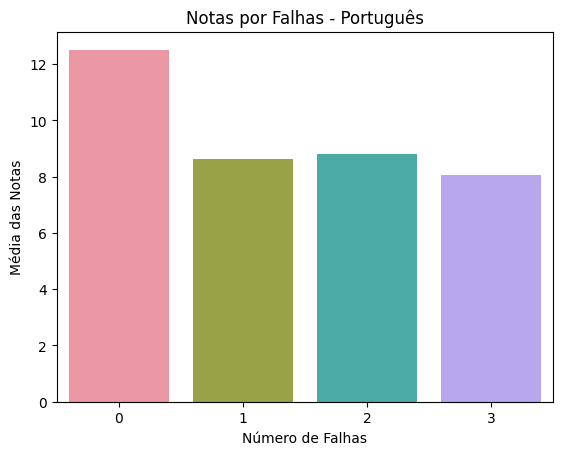

In [ ]:
notas_por_falha = df1_.groupby('failures')['G3'].mean().reset_index()

sns.barplot(x='failures', y='value', data=pd.melt(notas_por_falha, ['failures']))

plt.title('Notas por Falhas - Português')
plt.xlabel('Número de Falhas')
plt.ylabel('Média das Notas')

plt.show()

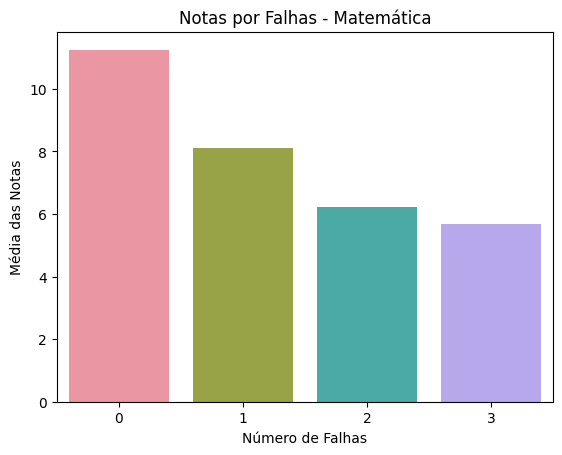

In [ ]:
notas_por_falha = df2_.groupby('failures')['G3'].mean().reset_index()

sns.barplot(x='failures', y='value', data=pd.melt(notas_por_falha, ['failures']))

plt.title('Notas por Falhas - Matemática')
plt.xlabel('Número de Falhas')
plt.ylabel('Média das Notas')

plt.show()

O número de falhas acaba sendo bem relevante na média das notas, então pode-se considerar uma variável interessante de se manter

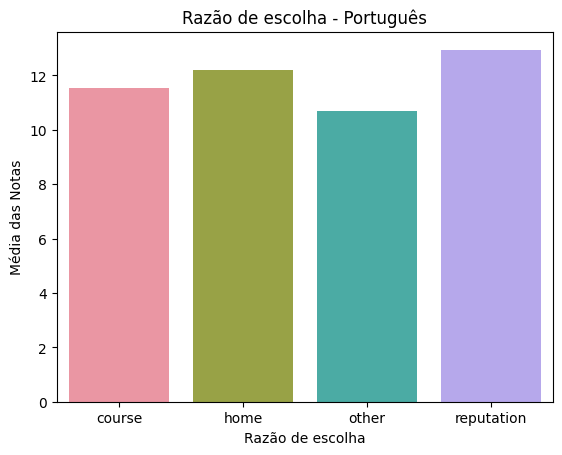

In [ ]:
notas_por_falha = df1_.groupby('reason')['G3'].mean().reset_index()

sns.barplot(x='reason', y='value', data=pd.melt(notas_por_falha, ['reason']))

plt.title('Razão de escolha - Português')
plt.xlabel('Razão de escolha')
plt.ylabel('Média das Notas')

plt.show()

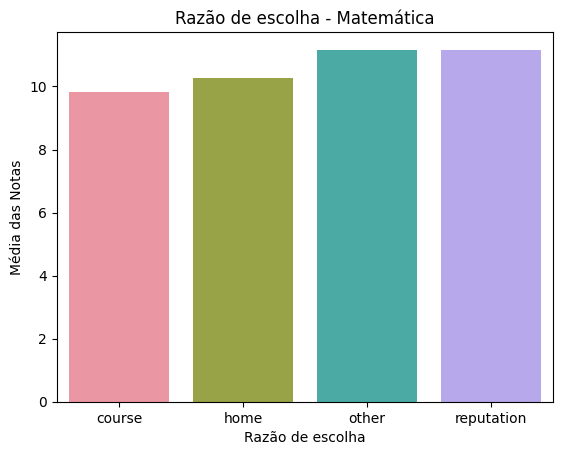

In [ ]:
notas_por_falha = df2_.groupby('reason')['G3'].mean().reset_index()

sns.barplot(x='reason', y='value', data=pd.melt(notas_por_falha, ['reason']))

plt.title('Razão de escolha - Matemática')
plt.xlabel('Razão de escolha')
plt.ylabel('Média das Notas')

plt.show()

A variável "reason" significa o razão de escolha do curso, considerando as médias muito semelhantes vou retirar essa coluna do dataset, por se tratar de uma váriavel nominal que não traz tanta informação a primeira vista.

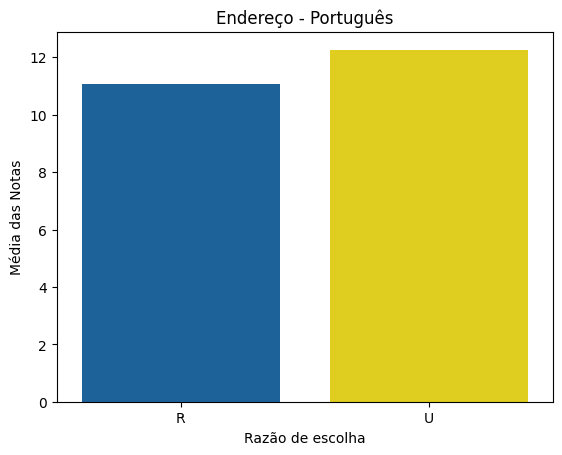

In [ ]:
endereco = df1_.groupby('address')['G3'].mean().reset_index()

sns.barplot(x='address', y='value', data=pd.melt(endereco, ['address']))

plt.title('Endereço - Português')
plt.xlabel('Razão de escolha')
plt.ylabel('Média das Notas')

plt.show()

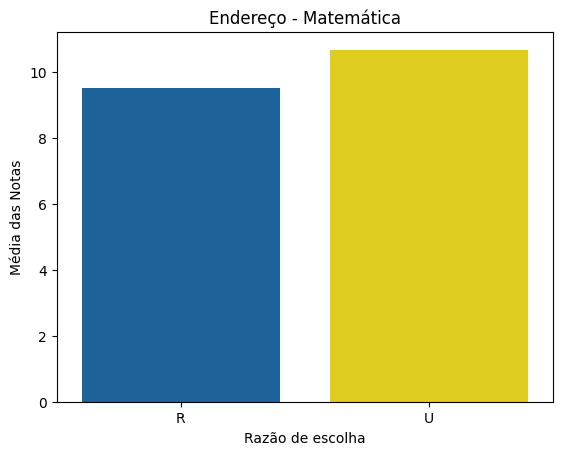

In [ ]:
notas_por_falha = df2_.groupby('address')['G3'].mean().reset_index()

sns.barplot(x='address', y='value', data=pd.melt(notas_por_falha, ['address']))

plt.title('Endereço - Matemática')
plt.xlabel('Razão de escolha')
plt.ylabel('Média das Notas')

plt.show()

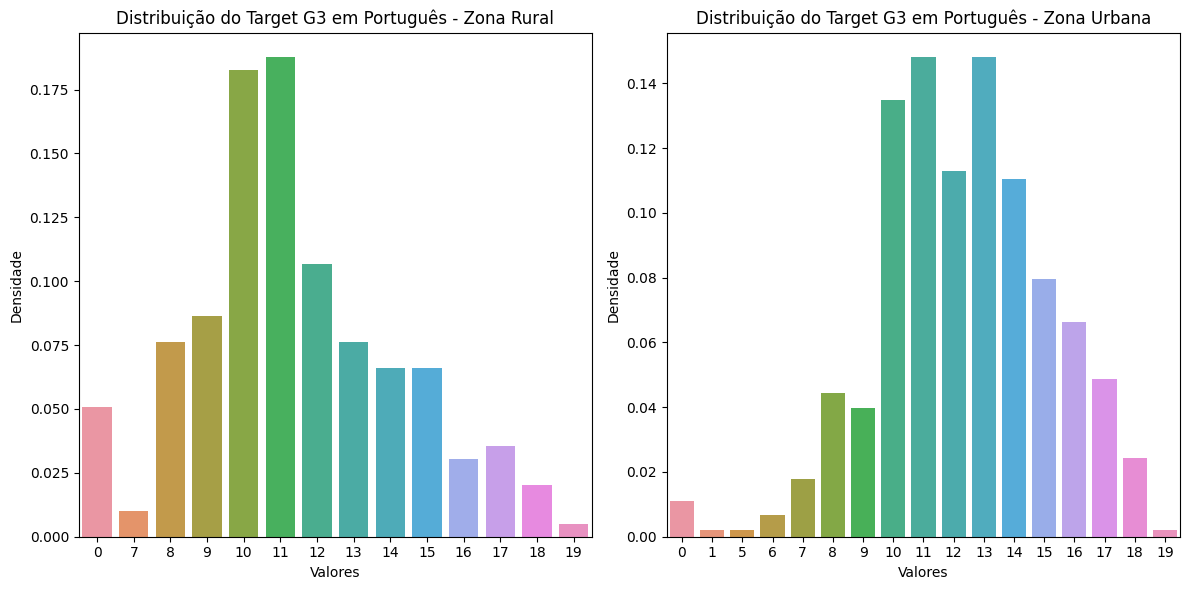

U    452
R    197
Name: address, dtype: int64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para o sexo masculino
densidade_masc = df1_.loc[df1_["address"] == "U"]['G3'].value_counts(normalize=True)
densidade_sorted_masc = densidade_masc.sort_index()

sns.barplot(x=densidade_sorted_masc.index, y=densidade_sorted_masc.values, ax=axs[1])
axs[1].set_title('Distribuição do Target G3 em Português - Zona Urbana')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Densidade')

# Gráfico para o sexo feminino
densidade_fem = df1_.loc[df1_["address"] == "R"]['G3'].value_counts(normalize=True)
densidade_sorted_fem = densidade_fem.sort_index()

sns.barplot(x=densidade_sorted_fem.index, y=densidade_sorted_fem.values, ax=axs[0])
axs[0].set_title('Distribuição do Target G3 em Português - Zona Rural')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Densidade')

plt.tight_layout()

plt.show()

df1_.address.value_counts()

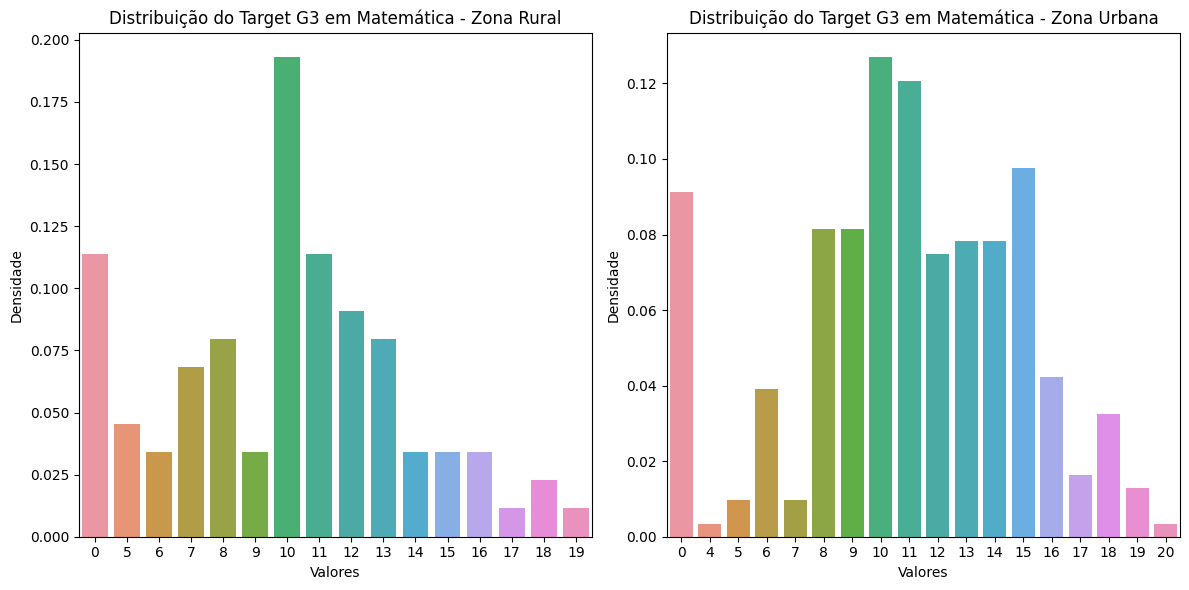

U    307
R     88
Name: address, dtype: int64

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para o sexo masculino
densidade_masc = df2_.loc[df2_["address"] == "U"]['G3'].value_counts(normalize=True)
densidade_sorted_masc = densidade_masc.sort_index()

sns.barplot(x=densidade_sorted_masc.index, y=densidade_sorted_masc.values, ax=axs[1])
axs[1].set_title('Distribuição do Target G3 em Matemática - Zona Urbana')
axs[1].set_xlabel('Valores')
axs[1].set_ylabel('Densidade')

# Gráfico para o sexo feminino
densidade_fem = df2_.loc[df2_["address"] == "R"]['G3'].value_counts(normalize=True)
densidade_sorted_fem = densidade_fem.sort_index()

sns.barplot(x=densidade_sorted_fem.index, y=densidade_sorted_fem.values, ax=axs[0])
axs[0].set_title('Distribuição do Target G3 em Matemática - Zona Rural')
axs[0].set_xlabel('Valores')
axs[0].set_ylabel('Densidade')

plt.tight_layout()

plt.show()

df2_.address.value_counts()

Analisando o problema por região de onde o aluno mora, é possível entender que alunos da Zona rural possuem notas mais concentradas no valor média, enquanto alunos da zona urbana as notas variam mais, talvez isso se dê pela diferença na quantidade de alunos de zona rural que são muito menores do que a quantidade de alunos da zona urbana, sendo a zona urbana mais do que o dobro de alunos da zona rural, nos dois casos.

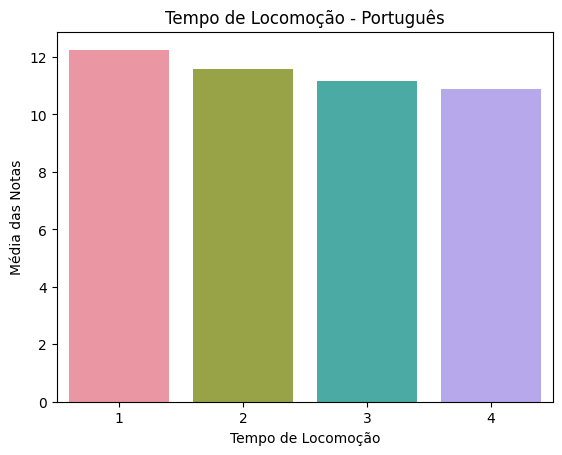

In [ ]:
notas_por_tt = df1_.groupby('traveltime')['G3'].mean().reset_index()

sns.barplot(x='traveltime', y='value', data=pd.melt(notas_por_tt, ['traveltime']))

plt.title('Tempo de Locomoção - Português')
plt.xlabel('Tempo de Locomoção')
plt.ylabel('Média das Notas')

# Exibir o plot
plt.show()

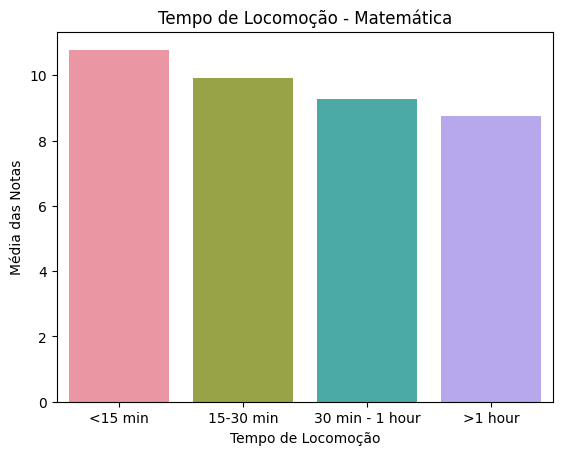

In [ ]:
notas_por_tt = df2_.groupby('traveltime')['G3'].mean().reset_index()

sns.barplot(x='traveltime', y='value', data=pd.melt(notas_por_tt, ['traveltime']))

rotulos = ['<15 min', '15-30 min', '30 min - 1 hour', '>1 hour']
posicoes = range(len(rotulos))
plt.xticks(posicoes, rotulos, rotation=0, ha='center')

plt.title('Tempo de Locomoção - Matemática')
plt.xlabel('Tempo de Locomoção')
plt.ylabel('Média das Notas')

# Exibir o plot
plt.show()

É facilmente observável que quanto maior o tempo de locomoção, mais as notas dos alunos são afetadas, essa feature pode dizer bastante da realidade de muitas escolas, já que podemos considerar que quando temos um menor tempo de locomoção temos mais tempo para descansar, estudar, lazer, entre outras atividades.

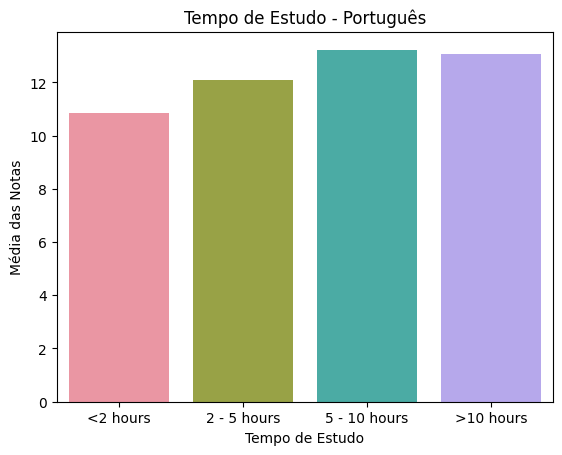

In [ ]:
notas_por_tt = df1_.groupby('studytime')['G3'].mean().reset_index()

sns.barplot(x='studytime', y='value', data=pd.melt(notas_por_tt, ['studytime']))

rotulos = ['<2 hours', '2 - 5 hours', '5 - 10 hours', '>10 hours']
posicoes = range(len(rotulos))
plt.xticks(posicoes, rotulos, rotation=0, ha='center')
plt.title('Tempo de Estudo - Português')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Média das Notas')

# Exibir o plot
plt.show()

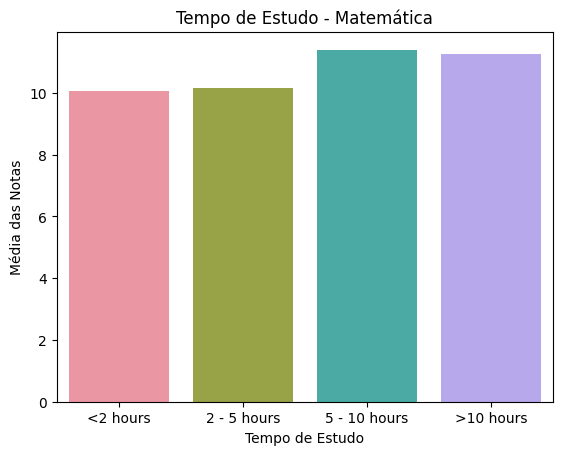

In [ ]:
notas_por_tt = df2_.groupby('studytime')['G3'].mean().reset_index()

sns.barplot(x='studytime', y='value', data=pd.melt(notas_por_tt, ['studytime']))

rotulos = ['<2 hours', '2 - 5 hours', '5 - 10 hours', '>10 hours']
posicoes = range(len(rotulos))
plt.xticks(posicoes, rotulos, rotation=0, ha='center')
plt.title('Tempo de Estudo - Matemática')
plt.xlabel('Tempo de Estudo')
plt.ylabel('Média das Notas')

plt.show()

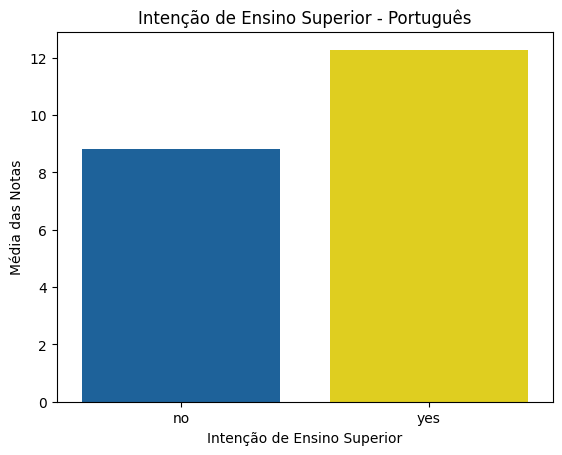

In [ ]:
notas_por_h = df1_.groupby('higher')['G3'].mean().reset_index()

sns.barplot(x='higher', y='value', data=pd.melt(notas_por_h, ['higher']))

plt.title('Intenção de Ensino Superior - Português')
plt.xlabel('Intenção de Ensino Superior')
plt.ylabel('Média das Notas')

plt.show()

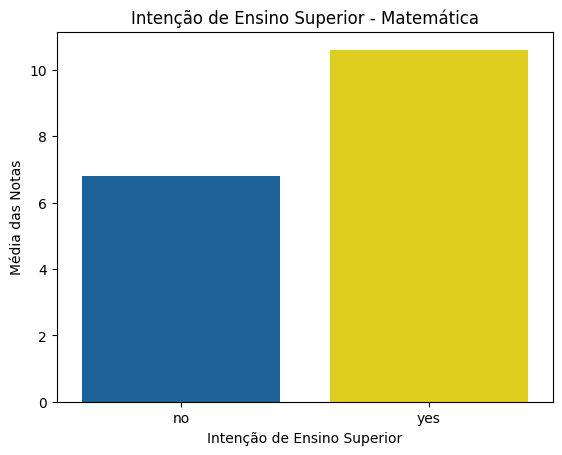

In [ ]:
notas_por_h = df2_.groupby('higher')['G3'].mean().reset_index()

sns.barplot(x='higher', y='value', data=pd.melt(notas_por_h, ['higher']))

plt.title('Intenção de Ensino Superior - Matemática')
plt.xlabel('Intenção de Ensino Superior')
plt.ylabel('Média das Notas')

plt.show()

Vendo esses últimos gráficos é fácil enxergar que, alunos que desejam ensino superior, possuem notas bem mais altas, além de alunos que estudam mais possuem melhor desempenho, o que é esperado.

Considerando algumas informações já retiradas da nossa análise, é possível fazer uma rápida seleção de algumas colunas. Como ainda temos muitas colunas, a última análise será feita utilizando a correlação de todas as colunas selecionadas.

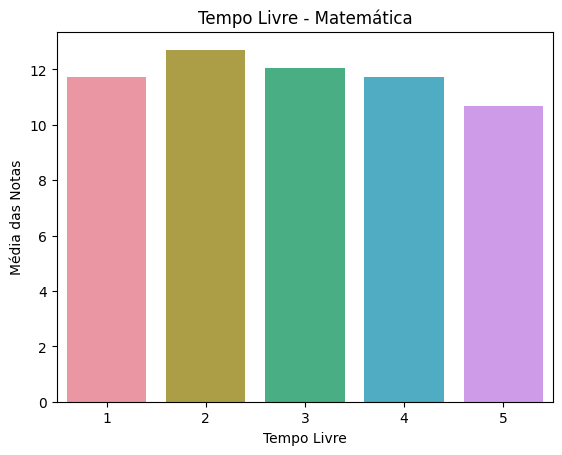

In [ ]:
notas_por_h = df1_.groupby('freetime')['G3'].mean().reset_index()

sns.barplot(x='freetime', y='value', data=pd.melt(notas_por_h, ['freetime']))

plt.title('Tempo Livre - Matemática')
plt.xlabel('Tempo Livre')
plt.ylabel('Média das Notas')

plt.show()

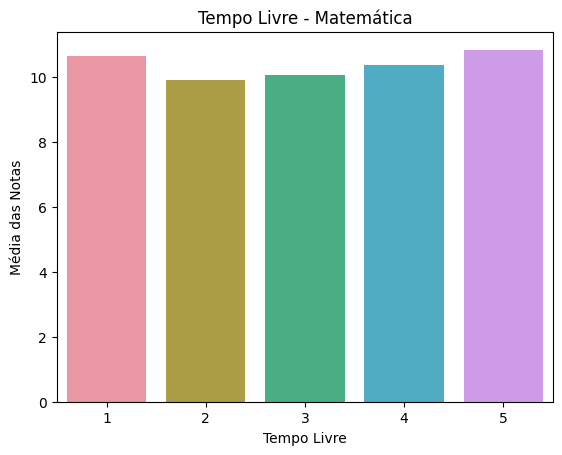

In [ ]:
notas_por_h = df2_.groupby('famrel')['G3'].mean().reset_index()

sns.barplot(x='famrel', y='value', data=pd.melt(notas_por_h, ['famrel']))

plt.title('Tempo Livre - Matemática')
plt.xlabel('Tempo Livre')
plt.ylabel('Média das Notas')

plt.show()

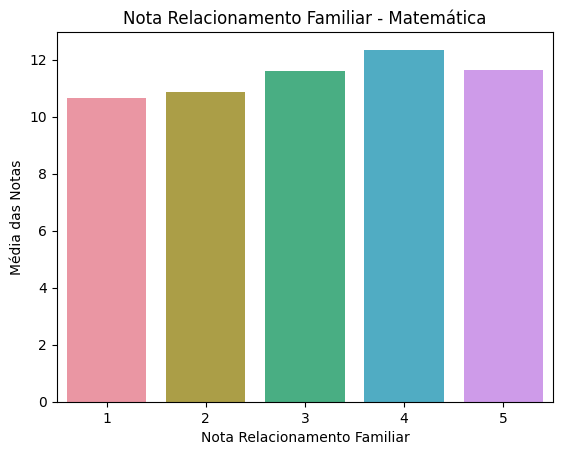

In [ ]:
notas_por_h = df1_.groupby('famrel')['G3'].mean().reset_index()

sns.barplot(x='famrel', y='value', data=pd.melt(notas_por_h, ['famrel']))

plt.title('Nota Relacionamento Familiar - Matemática')
plt.xlabel('Nota Relacionamento Familiar')
plt.ylabel('Média das Notas')

plt.show()

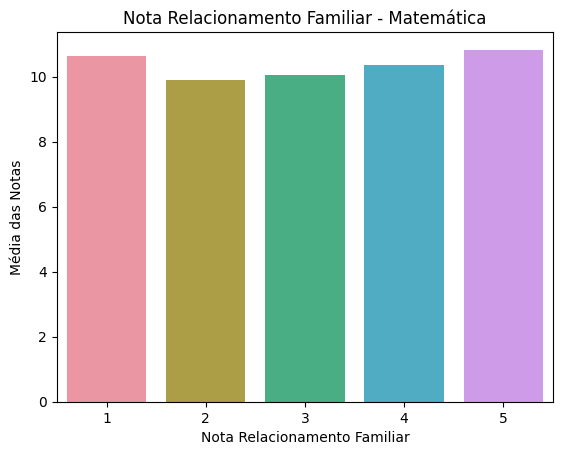

In [ ]:
notas_por_h = df2_.groupby('famrel')['G3'].mean().reset_index()

sns.barplot(x='famrel', y='value', data=pd.melt(notas_por_h, ['famrel']))

plt.title('Nota Relacionamento Familiar - Matemática')
plt.xlabel('Nota Relacionamento Familiar')
plt.ylabel('Média das Notas')

plt.show()

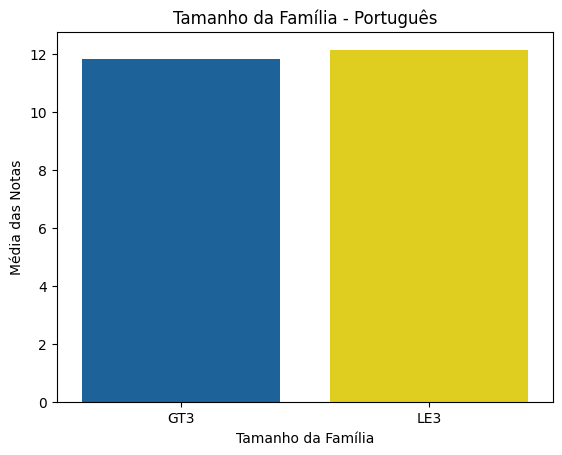

In [ ]:
notas_por_h = df1_.groupby('famsize')['G3'].mean().reset_index()

sns.barplot(x='famsize', y='value', data=pd.melt(notas_por_h, ['famsize']))

plt.title('Tamanho da Família - Português')
plt.xlabel('Tamanho da Família')
plt.ylabel('Média das Notas')

plt.show()

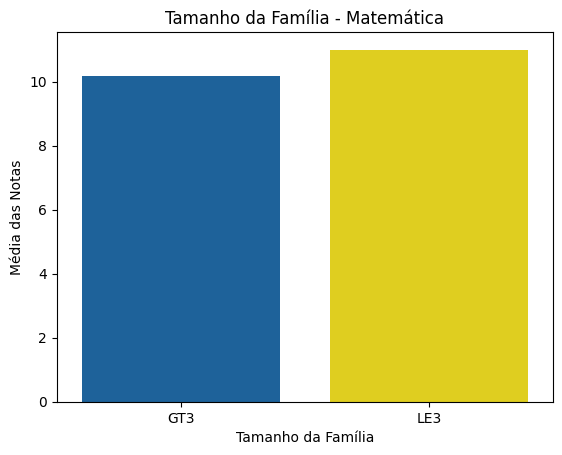

In [ ]:
notas_por_h = df2_.groupby('famsize')['G3'].mean().reset_index()

sns.barplot(x='famsize', y='value', data=pd.melt(notas_por_h, ['famsize']))

plt.title('Tamanho da Família - Matemática')
plt.xlabel('Tamanho da Família')
plt.ylabel('Média das Notas')

plt.show()

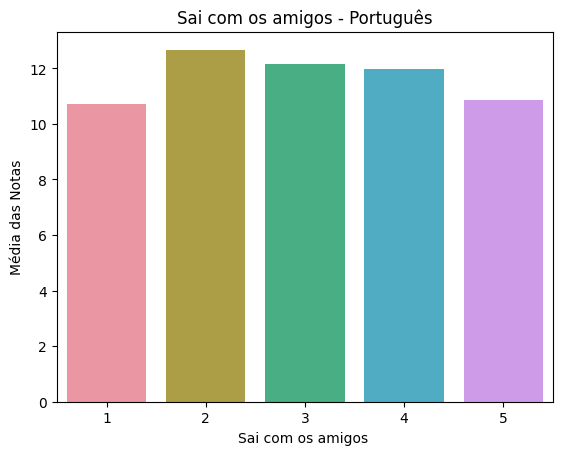

In [ ]:
notas_por_h = df1_.groupby('goout')['G3'].mean().reset_index()

sns.barplot(x='goout', y='value', data=pd.melt(notas_por_h, ['goout']))

plt.title('Sai com os amigos - Português')
plt.xlabel('Sai com os amigos ')
plt.ylabel('Média das Notas')

plt.show()

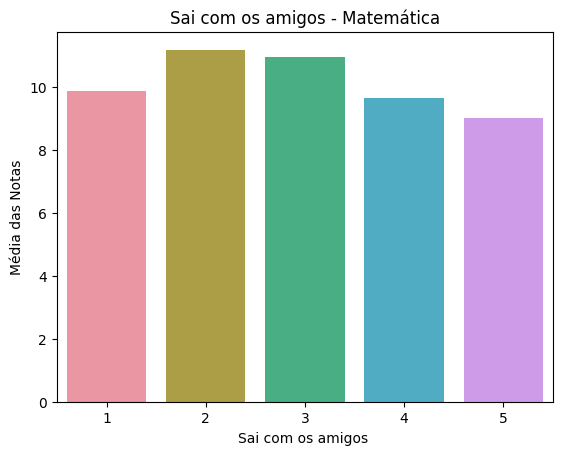

In [ ]:
notas_por_h = df2_.groupby('goout')['G3'].mean().reset_index()

sns.barplot(x='goout', y='value', data=pd.melt(notas_por_h, ['goout']))

plt.title('Sai com os amigos - Matemática')
plt.xlabel('Sai com os amigos ')
plt.ylabel('Média das Notas')

plt.show()

Tempo Livre, Relacionamento Familiar e Tamanho da Família, não trazem grandes diferenças na média de notas, o que pode implicar na pouca informação trazida por essas features.

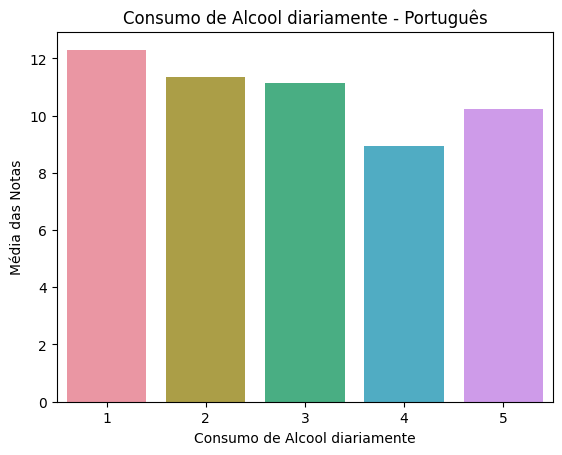

In [ ]:
notas_por_h = df1_.groupby('Dalc')['G3'].mean().reset_index()

sns.barplot(x='Dalc', y='value', data=pd.melt(notas_por_h, ['Dalc']))

plt.title('Consumo de Alcool diariamente - Português')
plt.xlabel('Consumo de Alcool diariamente')
plt.ylabel('Média das Notas')

plt.show()

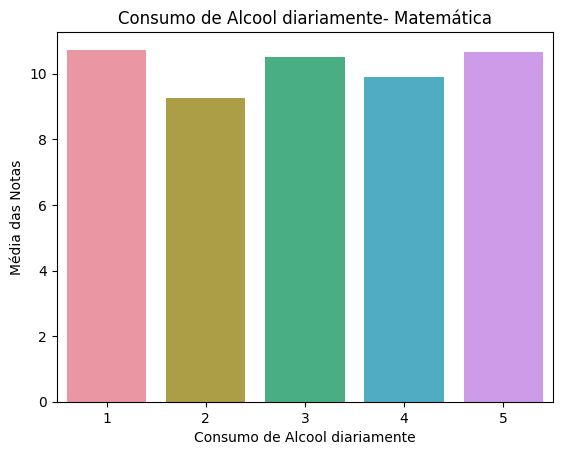

In [ ]:
notas_por_h = df2_.groupby('Dalc')['G3'].mean().reset_index()

sns.barplot(x='Dalc', y='value', data=pd.melt(notas_por_h, ['Dalc']))

plt.title('Consumo de Alcool diariamente- Matemática')
plt.xlabel('Consumo de Alcool diariamente')
plt.ylabel('Média das Notas')

plt.show()

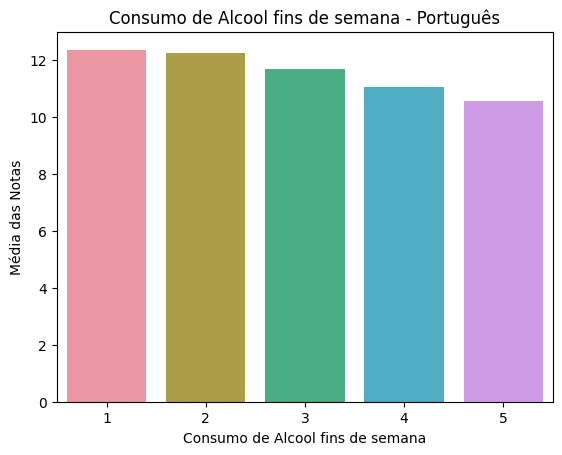

In [ ]:
notas_por_h = df1_.groupby('Walc')['G3'].mean().reset_index()

sns.barplot(x='Walc', y='value', data=pd.melt(notas_por_h, ['Walc']))

plt.title('Consumo de Alcool fins de semana - Português')
plt.xlabel('Consumo de Alcool fins de semana')
plt.ylabel('Média das Notas')

plt.show()

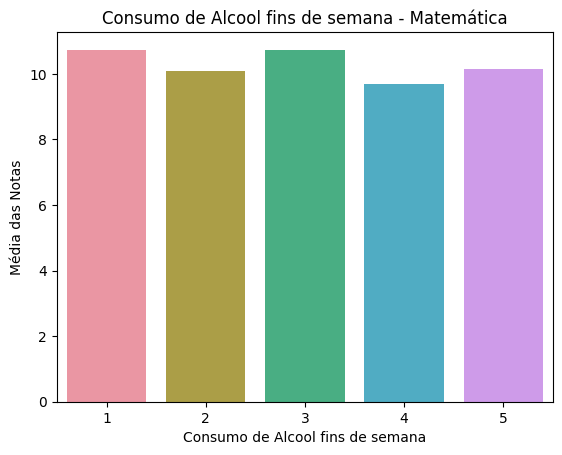

In [ ]:
notas_por_h = df2_.groupby('Walc')['G3'].mean().reset_index()

sns.barplot(x='Walc', y='value', data=pd.melt(notas_por_h, ['Walc']))

plt.title('Consumo de Alcool fins de semana - Matemática')
plt.xlabel('Consumo de Alcool fins de semana')
plt.ylabel('Média das Notas')

plt.show()

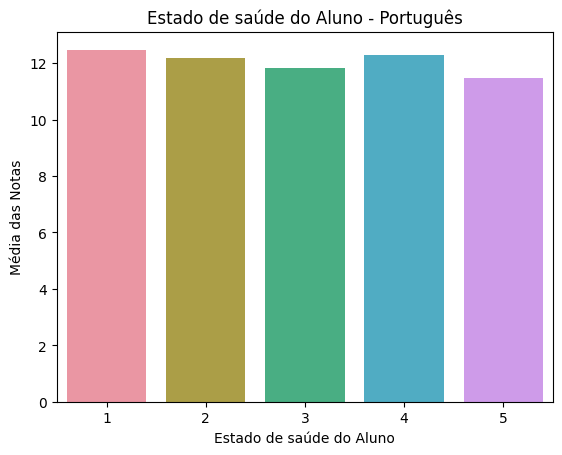

In [ ]:
notas_por_h = df1_.groupby('health')['G3'].mean().reset_index()

sns.barplot(x='health', y='value', data=pd.melt(notas_por_h, ['health']))

plt.title('Estado de saúde do Aluno - Português')
plt.xlabel('Estado de saúde do Aluno')
plt.ylabel('Média das Notas')

plt.show()

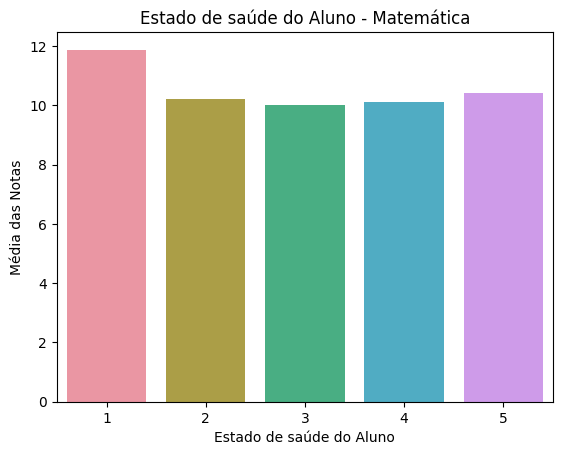

In [ ]:
notas_por_h = df2_.groupby('health')['G3'].mean().reset_index()

sns.barplot(x='health', y='value', data=pd.melt(notas_por_h, ['health']))

plt.title('Estado de saúde do Aluno - Matemática')
plt.xlabel('Estado de saúde do Aluno')
plt.ylabel('Média das Notas')

plt.show()

Para as turmas de Matemática, o consumo de alcool não parece ter relação com as notas, no entanto, quando consideramos o consumo de alcool para a turma de português parece ter uma certa correlação entre essas variáveis. Como são comportamentos parecidos, manter a variável "Walc" que traz informações sobre o consumo de álcool aos fins de semana parece ser pouco importante.

Quanto ao estado de saúde, parece ter pouco relevância também, mas irei mantê-lo devido ao alto valor para alunos completamente saudáveis na turma de matemática.

In [ ]:
drop_columns = ["Mjob", "Fjob", "reason", "famsize", "famrel",
                "freetime", "Walc", "guardian", "nursery",
                "activities", "goout", "Pstatus"]

In [ ]:
df1_dropped = df1_.drop(drop_columns, axis = 1)
df2_dropped = df2_.drop(drop_columns, axis = 1)

Analisar correlação ao final

In [ ]:
yes_or_no_columns = ["schoolsup", "famsup", "paid", "higher", "internet", "romantic"]

df1_parsed = df1_dropped.copy()

df2_parsed = df2_dropped.copy()

for column in yes_or_no_columns:
    df1_parsed[column] = df1_dropped[column].apply(lambda x: 1 if x == "yes" else 0)

df1_parsed["sex"] = df1_dropped["sex"].apply(lambda x: 1 if x == "M" else 0)
df1_parsed["address"] = df1_dropped["address"].apply(lambda x: 1 if x == "U" else 0)
df1_parsed["school"] = df1_dropped["school"].apply(lambda x: 1 if x == "GP" else 0)
#df1_parsed["Pstatus"] = df1_dropped["Pstatus"].apply(lambda x: 1 if x == "A" else 0)

for column in yes_or_no_columns:
    df2_parsed[column] = df2_dropped[column].apply(lambda x: 1 if x == "yes" else 0)

df2_parsed["sex"] = df2_dropped["sex"].apply(lambda x: 1 if x == "M" else 0)
df2_parsed["address"] = df2_dropped["address"].apply(lambda x: 1 if x == "U" else 0)
df2_parsed["school"] = df2_dropped["school"].apply(lambda x: 1 if x == "GP" else 0)
#df2_parsed["Pstatus"] = df2_dropped["Pstatus"].apply(lambda x: 1 if x == "A" else 0)

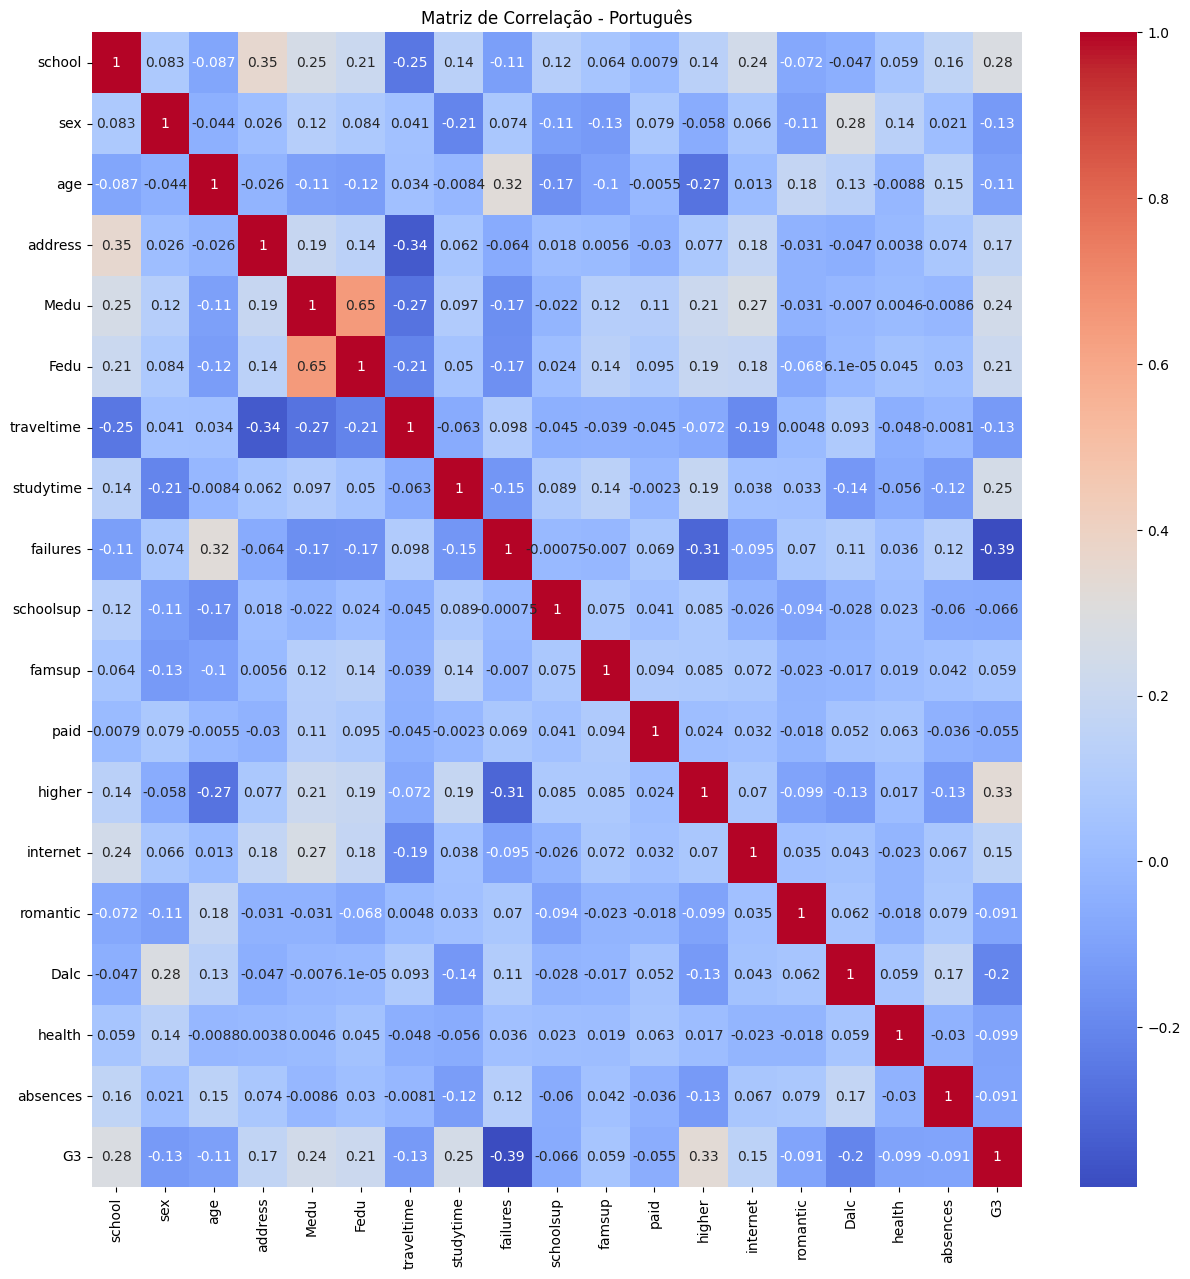

In [ ]:
matriz_correlacao = df1_parsed.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

plt.title('Matriz de Correlação - Português')
plt.show()

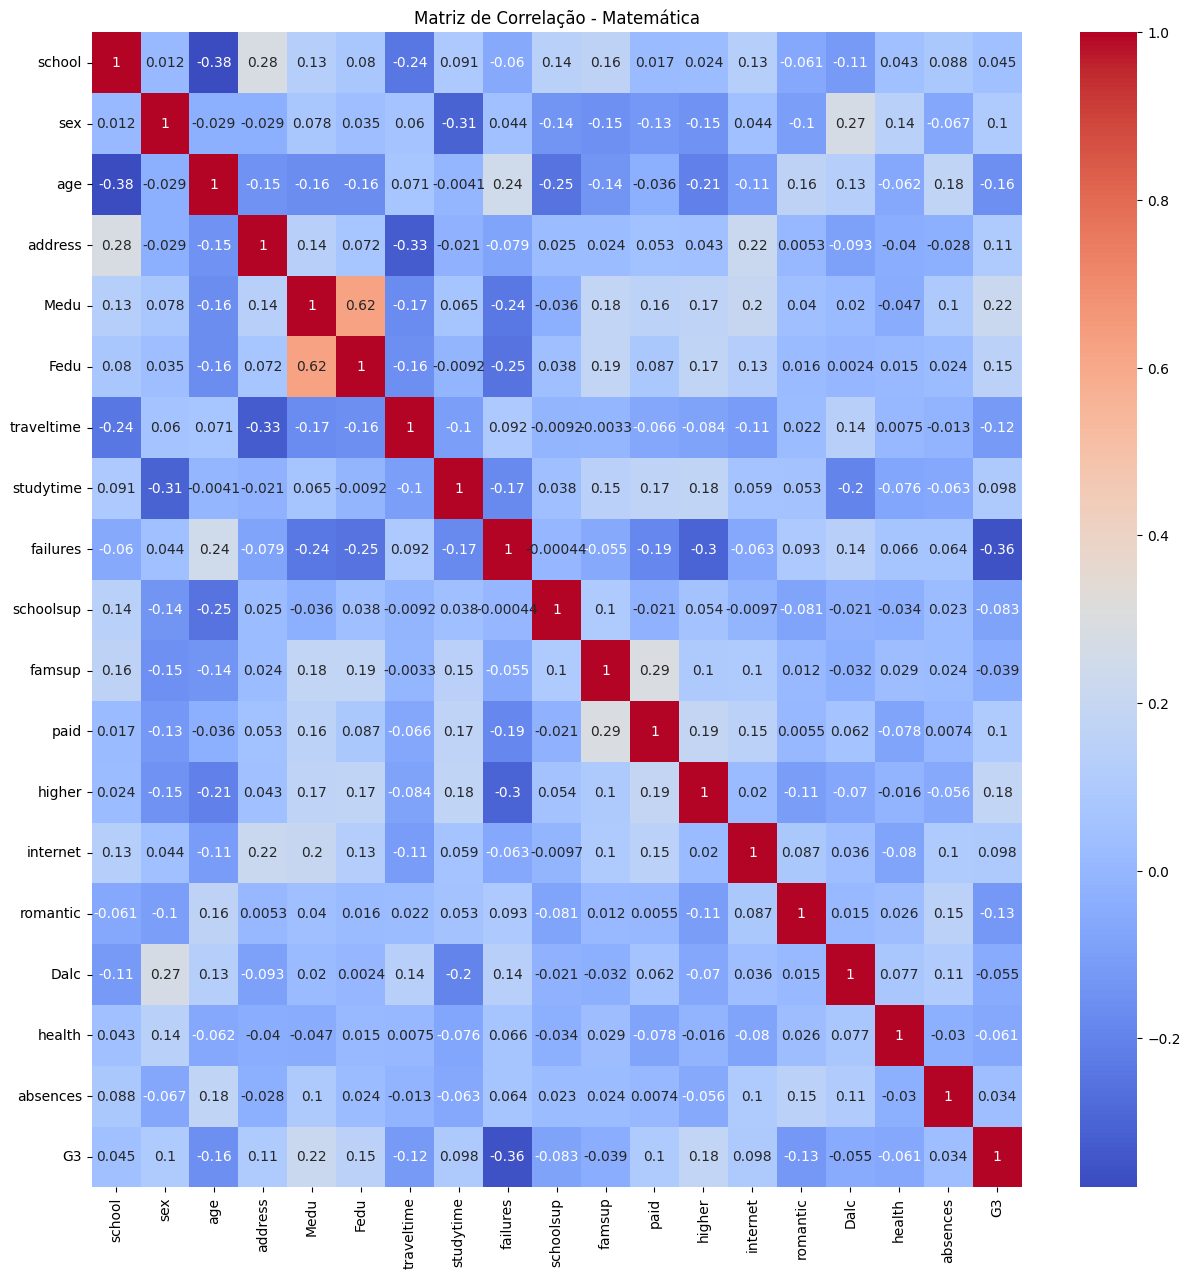

In [ ]:
matriz_correlacao = df2_parsed.corr()

plt.figure(figsize=(15, 15))

sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm')

plt.title('Matriz de Correlação - Matemática')
plt.show()

Olhando as correlações com G3, pode-se notar que os maiores valores são das variáveis referentes ao nível de escolaridade dos pais, do tempo de estudo e do desejo de cursar ensino superior. Mas aquela com maior correlação acaba sendo o número de falhas, que traz bastante informação sobre a nota final.

Mas interessante salientar que como "falhar" pode ser um evento raro, essa correlação pode acabar sendo não tão importante no final das contas.

In [ ]:
df1_parsed['final_grade'] = -1

df1_parsed.loc[(df1_parsed.G3 >= 15) & (df1_parsed.G3 <= 20), 'final_grade'] = 2. # alto rendimento
df1_parsed.loc[(df1_parsed.G3 >= 10) & (df1_parsed.G3 <= 14), 'final_grade'] = 1. # médio rendimento
df1_parsed.loc[(df1_parsed.G3 >= 0) & (df1_parsed.G3 <= 9), 'final_grade'] = 0. # baixo rendimento

df1_final = df1_parsed.drop("G3", axis = 1)


df2_parsed.loc[(df2_parsed.G3 >= 15) & (df2_parsed.G3 <= 20), 'final_grade'] = 2.
df2_parsed.loc[(df2_parsed.G3 >= 10) & (df2_parsed.G3 <= 14), 'final_grade'] = 1.
df2_parsed.loc[(df2_parsed.G3 >= 0) & (df2_parsed.G3 <= 9), 'final_grade'] = 0.

df2_final = df2_parsed.drop("G3", axis = 1)


In [ ]:
df1_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   school       649 non-null    int64
 1   sex          649 non-null    int64
 2   age          649 non-null    int64
 3   address      649 non-null    int64
 4   Medu         649 non-null    int64
 5   Fedu         649 non-null    int64
 6   traveltime   649 non-null    int64
 7   studytime    649 non-null    int64
 8   failures     649 non-null    int64
 9   schoolsup    649 non-null    int64
 10  famsup       649 non-null    int64
 11  paid         649 non-null    int64
 12  higher       649 non-null    int64
 13  internet     649 non-null    int64
 14  romantic     649 non-null    int64
 15  Dalc         649 non-null    int64
 16  health       649 non-null    int64
 17  absences     649 non-null    int64
 18  final_grade  649 non-null    int64
dtypes: int64(19)
memory usage: 96.5 KB


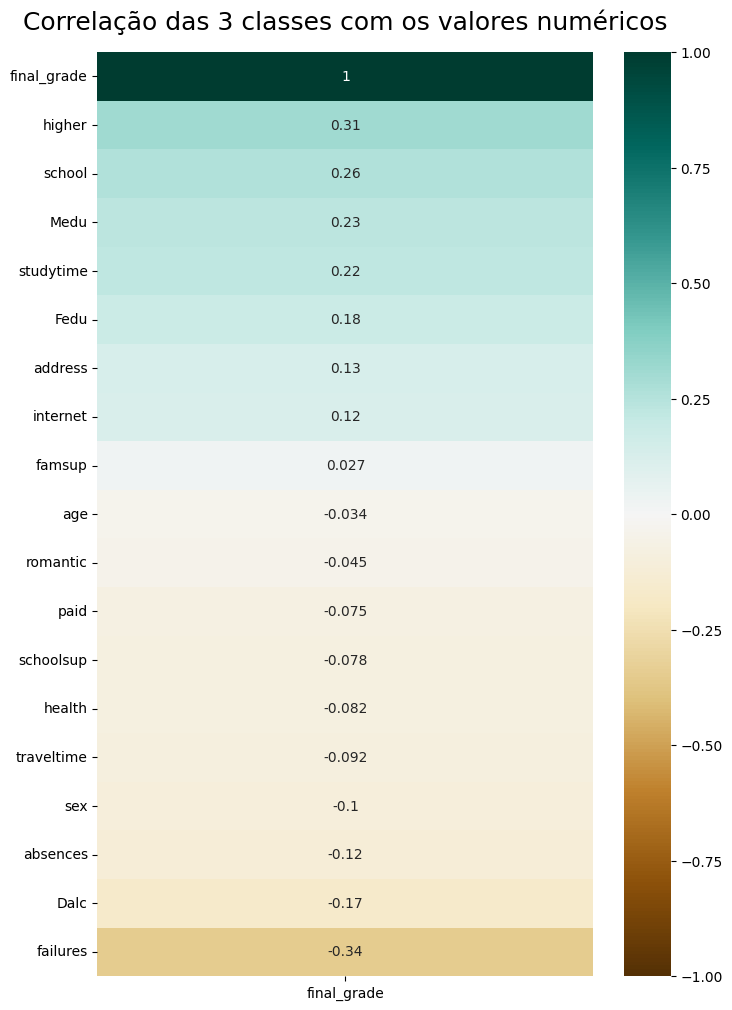

In [ ]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df1_final.corr()[['final_grade']].sort_values(by='final_grade', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlação das 3 classes com os valores numéricos', fontdict={'fontsize':18}, pad=16);


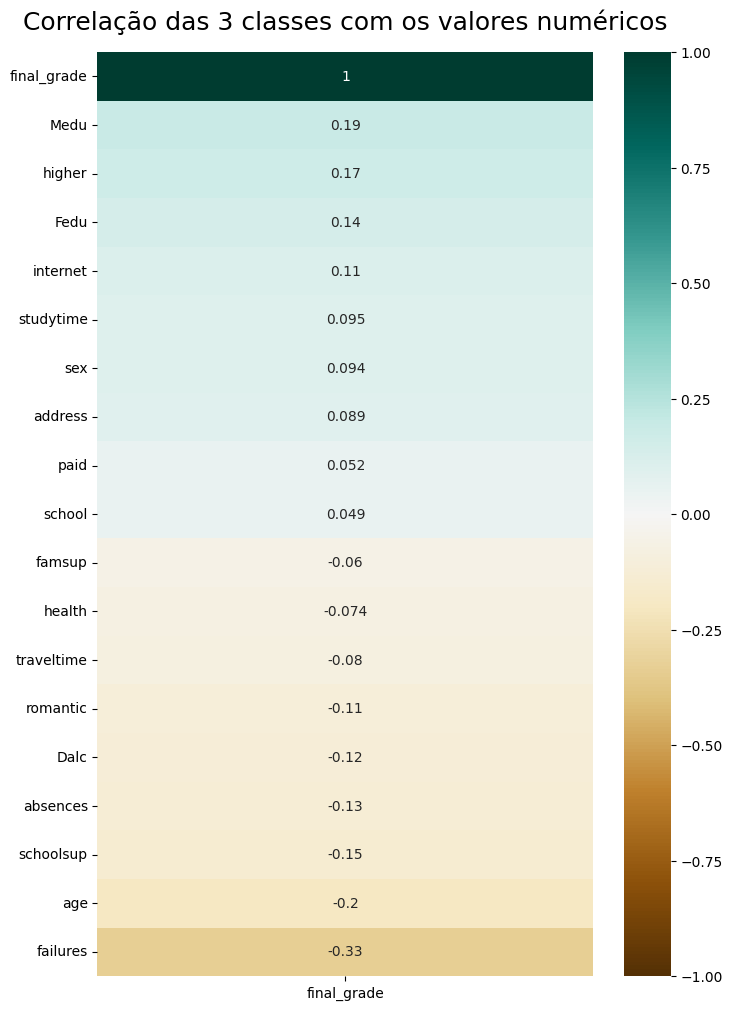

In [ ]:
plt.figure(figsize=(8, 12))

heatmap = sns.heatmap(df2_final.corr()[['final_grade']].sort_values(by='final_grade', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Correlação das 3 classes com os valores numéricos', fontdict={'fontsize':18}, pad=16);


Podemos tirar algumas informações dessas correlações, elas demonstram melhor como funciona a diferença entre as duas turmas

# Construção e Avaliação dos Modelos

In [ ]:
X1_ = df1_final.drop("final_grade", axis = 1)
Y1_ = np.array(df1_final["final_grade"])

X2_ = df2_final.drop("final_grade", axis = 1)
Y2_ = np.array(df2_final["final_grade"])

In [ ]:
# Divisão em treino e teste
#print(Y2_)

label_encoder = LabelEncoder()
Y1_ = label_encoder.fit_transform(Y1_)
Y2_ = label_encoder.transform(Y2_)

#print(Y2_)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_, Y1_, test_size=0.2, random_state=42)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_, Y2_, test_size=0.2, random_state=42)

# XGBoost

In [ ]:
# Juntando os conjuntos de dados
X_combined = np.concatenate((X1_, X2_), axis=0)
Y_combined = np.concatenate((Y1_, Y2_), axis=0)

# Divisão em treino e teste
X_combined_train, X_combined_test, Y_combined_train, Y_combined_test = train_test_split(X_combined, Y_combined, test_size=0.3, random_state=42)

In [ ]:
param_grid = {
    'learning_rate': [0.1, 0.5, 0.01, 0.05],
    'n_estimators': [30, 50, 100, 250],
    'max_depth': [None, 3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 10, 50],
    'gamma': [0, 0.3, 0,5],
}

# Criação do modelo XGBoost
model = XGBClassifier()

# Validação cruzada com hiperparametrização
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=['accuracy', 'f1_weighted'], refit='accuracy')
grid_search.fit(X_combined_train, Y_combined_train)

# Melhor configuração encontrada
best_params = grid_search.best_params_
print("Melhores hiperparâmetros encontrados para o conjunto combinado:")
print(best_params)
print()

Melhores hiperparâmetros encontrados para o conjunto combinado:
{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}



In [ ]:
model_combined = XGBClassifier(**best_params)
model_combined.fit(X_combined_train, Y_combined_train)
Y_combined_pred = model_combined.predict(X_combined_test)

accuracy_combined = accuracy_score(Y_combined_test, Y_combined_pred)
f1_combined = f1_score(Y_combined_test, Y_combined_pred, average='weighted')

print("Resultados da validação cruzada para o conjunto combinado:")
print("Acurácia:", accuracy_combined)
print("F1 Score:", f1_combined)

Resultados da validação cruzada para o conjunto combinado:
Acurácia: 0.5987261146496815
F1 Score: 0.5497908693092359


# KNN

In [ ]:
#parmetros para grid search
param_grid = {'n_neighbors': [i for i in range(3,50) if i%2 != 0]}

## Português

In [ ]:
# Criar uma instância do classificador k-NN
knn = KNeighborsClassifier()

# Realizar a busca em grade com validação cruzada
knn = GridSearchCV(knn, param_grid, cv=5, scoring=['accuracy', 'f1_weighted'], refit='accuracy')
knn.fit(X1_train, Y1_train)

# Exibir os resultados
Y1_pred = knn.predict(X1_test)
print("Melhor valor de k: {}".format(knn.best_params_))
print(f'Acurácia: {accuracy_score(Y1_test, Y1_pred)}')
print(f'F1: {f1_score(Y1_test, Y1_pred, average="weighted")}')

Melhor valor de k: {'n_neighbors': 27}
Acurácia: 0.65
F1: 0.5190373394318936


## Matemática

In [ ]:
# Criar uma instância do classificador k-NN
knn = KNeighborsClassifier()

# Realizar a busca em grade com validação cruzada
knn = GridSearchCV(knn, param_grid, cv=5, scoring=['accuracy', 'f1_weighted'], refit='accuracy')
knn.fit(X2_train, Y2_train)

# Exibir os resultados
Y2_pred = knn.predict(X2_test)
print("Melhor valor de k: {}".format(knn.best_params_))
print(f'Acurácia: {accuracy_score(Y2_test, Y2_pred)}')
print(f'F1: {f1_score(Y2_test, Y2_pred, average="weighted")}')

Melhor valor de k: {'n_neighbors': 17}
Acurácia: 0.47468354430379744
F1: 0.4028257256105357


## Dataset Combinado

In [ ]:
# Criar uma instância do classificador k-NN
knn = KNeighborsClassifier()

# Realizar a busca em grade com validação cruzada
knn = GridSearchCV(knn, param_grid, cv=5, scoring=['accuracy', 'f1_weighted'], refit='accuracy')
knn.fit(X_combined, Y_combined)

# Exibir os resultados
Y_combined_pred = knn.predict(X_combined_test)
print("Melhor valor de k: {}".format(knn.best_params_))
print(f'Acurácia: {accuracy_score(Y_combined_test, Y_combined_pred)}')
print(f'F1: {f1_score(Y_combined_test, Y_combined_pred, average="weighted")}')

Melhor valor de k: {'n_neighbors': 31}
Acurácia: 0.5955414012738853
F1: 0.4813948084878546


# Regressão Logística

### Datasets separados

In [ ]:
# Separar o dataset em: treino (80%) / teste 20%

X = df1_final.drop("final_grade", axis = 1)
Y = np.array(df1_final["final_grade"])

X2_ = df2_final.drop("final_grade", axis = 1)
Y2_ = np.array(df2_final["final_grade"])

label_encoder = LabelEncoder()
Y1_ = label_encoder.fit_transform(Y1_)
Y2_ = label_encoder.transform(Y2_)

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_, Y1_, test_size=0.3, random_state=42)

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_, Y2_, test_size=0.3, random_state=42)

In [ ]:
# Regressão Logística
clf = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 300).fit(X1_train, Y1_train)
y_pred = clf.predict(X1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Model Evaluation metrics

print('Accuracy Score : ' + str(accuracy_score(Y1_test, y_pred)))
print('Recall Score : ' + str(recall_score(Y1_test, y_pred, pos_label='positive', average='macro')))
print('F1 Score : ' + str(f1_score(Y1_test, y_pred, pos_label='positive', average='macro')))

Accuracy Score : 0.6820512820512821
Recall Score : 0.500051282051282
F1 Score : 0.5332007316602952


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 300))
pipe.fit(X1_train, Y1_train)  # apply scaling on training data

y_pred = pipe.predict(X1_test)

print('Accuracy Score : ' + str(accuracy_score(Y1_test, y_pred)))
print('Precision Score : ' + str(precision_score(Y1_test, y_pred, pos_label='positive', average='micro')))
print('Recall Score : ' + str(recall_score(Y1_test, y_pred, pos_label='positive', average='macro')))
print('F1 Score : ' + str(f1_score(Y1_test, y_pred, pos_label='positive', average='macro')))

Accuracy Score : 0.6871794871794872
Precision Score : 0.6871794871794872
Recall Score : 0.5128717948717949
F1 Score : 0.5471639471639472


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### Datasets juntos

In [ ]:
# Juntando os conjuntos de dados
X_combined = np.concatenate((X1_, X2_), axis=0)
Y_combined = np.concatenate((Y1_, Y2_), axis=0)

# Divisão em treino e teste
X_combined_train, X_combined_test, Y_combined_train, Y_combined_test = train_test_split(X_combined, Y_combined, test_size=0.3, random_state=42)

In [ ]:
# Treinamento simples
clf = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", max_iter = 300).fit(X_combined_train, Y_combined_train)
y_pred = clf.predict(X_combined_test)

# Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(Y_combined_test, y_pred)))
print('Recall Score : ' + str(recall_score(Y_combined_test, y_pred, pos_label='positive', average='macro')))
print('F1 Score : ' + str(f1_score(Y_combined_test, y_pred, pos_label='positive', average='macro')))

Accuracy Score : 0.6114649681528662
Recall Score : 0.46595212989164936
F1 Score : 0.4841899525582582


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to s

# Conclusão

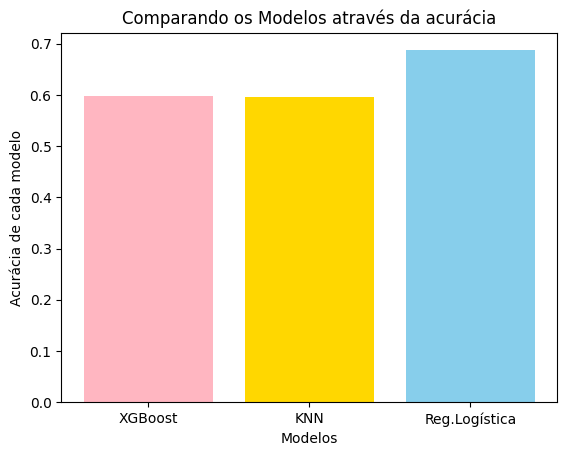

In [ ]:
# Comparando os 3 modelos
class_reg = [0.5987261146496815, 0.5955414012738853, 0.6871794871794872]

fig, ax = plt.subplots()

ax.bar(x=['XGBoost', 'KNN', 'Reg.Logística'],
       height=class_reg, color=['#FFB6C1', '#FFD700', '#87CEEB'])

ax.set_title('Comparando os Modelos através da acurácia')
ax.set_ylabel('Acurácia de cada modelo')
ax.set_xlabel('Modelos')

plt.show()

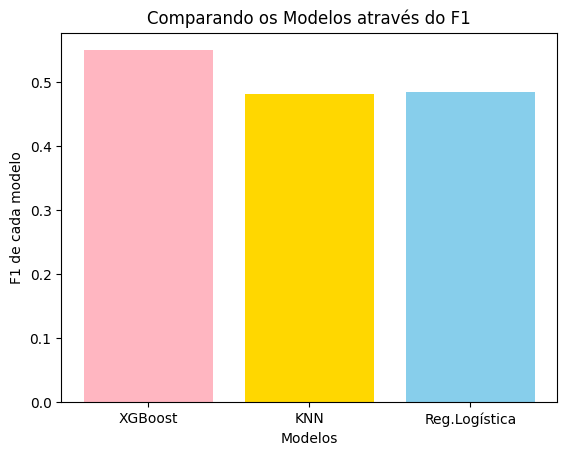

In [ ]:
class_reg = [0.5497908693092359, 0.4813948084878546, 0.4841899525582582]

fig, ax = plt.subplots()

ax.bar(x=['XGBoost', 'KNN', 'Reg.Logística'],
       height=class_reg, color=['#FFB6C1', '#FFD700', '#87CEEB'])

ax.set_title('Comparando os Modelos através do F1')
ax.set_ylabel('F1 de cada modelo')
ax.set_xlabel('Modelos')

plt.show()